In [1]:
# Assurez-vous que les bibliothèques nécessaires sont installées
#!pip install pandas numpy matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

<div style="background-color: #3498db; border-radius: 10px; text-align: center; padding: 10px;">
    <h1>Data Loading</h1>
</div>


In [3]:
# Importation des bibliothèques nécessaires
import pandas as pd

# Téléchargement des fichiers (les chemins doivent être adaptés si les fichiers sont en ligne)
# Pour l'exemple, nous utilisons des chemins locaux

# Transaction Records
transaction_records = pd.read_csv('Folder1/transaction_records.csv')

# Transaction Metadata
transaction_metadata = pd.read_csv('Folder1/transaction_metadata.csv')

# Customer Data
customer_data = pd.read_csv('Folder2/customer_data.csv')

# Account Activity
account_activity = pd.read_csv('Folder2/account_activity.csv')

# Fraud Indicators
fraud_indicators = pd.read_csv('Folder3/fraud_indicators.csv')

# Suspicious Activity
suspicious_activity = pd.read_csv('Folder3/suspicious_activity.csv')

# Amount Data
amount_data = pd.read_csv('Folder4/amount_data.csv')

# Anomaly Scores
anomaly_scores = pd.read_csv('Folder4/anomaly_scores.csv')

# Merchant Data
merchant_data = pd.read_csv('Folder5/merchant_data.csv')

# Transaction Category Labels
transaction_category_labels = pd.read_csv('Folder5/transaction_category_labels.csv')


let print the hed of the datasets:

In [4]:
# Afficher les premières lignes de chaque dataset pour examen
print("Transaction Records:")
print(transaction_records.head())

print("\nTransaction Metadata:")
print(transaction_metadata.head())

print("\nCustomer Data:")
print(customer_data.head())

print("\nAccount Activity:")
print(account_activity.head())

print("\nFraud Indicators:")
print(fraud_indicators.head())

print("\nSuspicious Activity:")
print(suspicious_activity.head())

print("\nAmount Data:")
print(amount_data.head())

print("\nAnomaly Scores:")
print(anomaly_scores.head())

print("\nMerchant Data:")
print(merchant_data.head())

print("\nTransaction Category Labels:")
print(transaction_category_labels.head())


Transaction Records:
   TransactionID     Amount  CustomerID  FraudIndicator  AnomalyScore   
0            1.0  30.726517      1216.0             NaN      0.482829  \
1            2.0  72.596257      1687.0             NaN      0.051093   
2            3.0        NaN      1205.0             NaN      0.120774   
3            4.0  36.922380      1288.0             NaN      0.025208   
4            NaN  48.843174      1930.0             NaN      0.111235   

   SuspiciousFlag  
0               0  
1               0  
2               0  
3               0  
4               0  

Transaction Metadata:
   TransactionID            Timestamp  MerchantID
0            1.0  2022-01-01 00:00:00      2580.0
1            NaN  2022-01-01 01:00:00      2770.0
2            3.0  2022-01-01 02:00:00      2495.0
3            4.0  2022-01-01 03:00:00      2607.0
4            5.0  2022-01-01 04:00:00      2286.0

Customer Data:
   CustomerID           Name   Age       Address
0      1001.0  Customer 1001  25

An Anomaly Score quantitatively measures how unusual a particular observation is compared to the overall data, using a scale that typically ranges from normal to highly unusual. This helps in assessing the risk of an observation being problematic. On the other hand, a Fraud Indicator Flag is a binary label, either 0 or 1, directly classifying each observation as normal or fraudulent based on predefined criteria, such as manual review or thresholds set on the anomaly score. While the anomaly score provides a continuous measure of risk, the fraud indicator flag gives a clear, binary decision, making it easier to take action on potential fraud cases.

In [5]:
import pandas as pd

# Fusion des données relatives aux transactions
transaction_data = pd.merge(transaction_records, transaction_metadata, on="TransactionID")
transaction_data = pd.merge(transaction_data, fraud_indicators, on="TransactionID")
transaction_data = pd.merge(transaction_data, amount_data, on="TransactionID")
transaction_data = pd.merge(transaction_data, anomaly_scores, on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_category_labels, on="TransactionID")

# Fusion des données relatives aux clients
customer_data = pd.merge(customer_data, account_activity, on="CustomerID")
customer_data = pd.merge(customer_data, suspicious_activity, on="CustomerID")

# Fusion finale des données des transactions avec les données des clients
data = pd.merge(transaction_data, customer_data, on="CustomerID")

# Affichage des dataframes résultants
print("Combined Data:")
print(data.head())
print("\nTransaction Data:")
print(transaction_data.head())
print("\nCustomer Data:")
print(customer_data.head())


MemoryError: Unable to allocate 18.4 GiB for an array with shape (2469241436,) and data type int64

In [ ]:
data.head()

,TransactionID,Amount,CustomerID,Timestamp,MerchantID,FraudIndicator,TransactionAmount,AnomalyScore,Category,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,2.0,77.400052,1897.0,2022-01-01 01:00:00,2049.0,0,54.250081,0.888897,Travel,NaN,33.0,NaN,9237.023060,2024-06-15,0
1,33.0,39.103095,1897.0,2022-01-02 08:00:00,2924.0,0,72.814051,0.284201,Online,NaN,33.0,NaN,9237.023060,2024-06-15,0
2,550.0,43.702103,1897.0,2022-01-23 21:00:00,2098.0,0,81.382011,0.082820,Retail,NaN,33.0,NaN,9237.023060,2024-06-15,0
3,6.0,27.255203,1911.0,2022-01-01 05:00:00,2772.0,0,48.069831,0.015545,Food,Customer 1911,45.0,Address 1911,4872.994428,2024-06-29,0
4,1282.0,21.575085,1911.0,2022-02-23 09:00:00,2503.0,0,15.486801,0.257909,Travel,Customer 1911,45.0,Address 1911,4872.994428,2024-06-29,0


<div style="background-color: #bde0fe; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Exploration</h1>
</div>


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1151 non-null   float64
 1   Amount             1099 non-null   float64
 2   CustomerID         1151 non-null   float64
 3   Timestamp          1096 non-null   object 
 4   MerchantID         1094 non-null   float64
 5   FraudIndicator     1151 non-null   int64  
 6   TransactionAmount  1093 non-null   float64
 7   AnomalyScore       1151 non-null   float64
 8   Category           1151 non-null   object 
 9   Name               1025 non-null   object 
 10  Age                1046 non-null   float64
 11  Address            1022 non-null   object 
 12  AccountBalance     1151 non-null   float64
 13  LastLogin          1151 non-null   object 
 14  SuspiciousFlag     1151 non-null   int64  
dtypes: float64(8), int64(2), object(5)
memory usage: 135.0+ KB


In [ ]:
data.shape

(1151, 15)

In [ ]:
data.describe()

,TransactionID,Amount,CustomerID,MerchantID,FraudIndicator,TransactionAmount,AnomalyScore,Age,AccountBalance,SuspiciousFlag
count,1151.000000,1099.000000,1151.000000,1094.000000,1151.000000,1093.000000,1151.000000,1046.000000,1151.000000,1151.000000
mean,754.370113,67.264402,1501.338836,2505.105119,0.055604,69.705733,0.497983,41.695985,6718.323032,0.029540
std,436.773905,145.305009,289.631373,290.559052,0.229255,146.277022,0.287191,13.620184,7205.300712,0.169387
min,2.000000,10.079793,1002.000000,2001.000000,0.000000,10.048390,0.000919,18.000000,1003.377627,0.000000
25%,367.500000,36.510932,1257.000000,2254.500000,0.000000,32.939456,0.256234,29.000000,3410.663615,0.000000
50%,752.000000,56.577991,1502.000000,2502.000000,0.000000,55.269427,0.505197,42.000000,6040.613233,0.000000
75%,1138.500000,78.387084,1759.500000,2753.000000,0.000000,77.677436,0.734302,54.000000,8210.566393,0.000000
max,1500.000000,1997.107870,1999.000000,2998.000000,1.000000,1497.228005,0.999857,64.000000,49992.066523,1.000000


In [ ]:

data.columns

Index(['TransactionID', 'Amount', 'CustomerID', 'Timestamp', 'MerchantID',
       'FraudIndicator', 'TransactionAmount', 'AnomalyScore', 'Category',
       'Name', 'Age', 'Address', 'AccountBalance', 'LastLogin',
       'SuspiciousFlag'],
      dtype='object')

In [ ]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'Amount', 'CustomerID', 'MerchantID', 'FraudIndicator', 'TransactionAmount', 'AnomalyScore', 'Age', 'AccountBalance', 'SuspiciousFlag']
['Timestamp', 'Category', 'Name', 'Address', 'LastLogin']


<div style="background-color: #cdb4db; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Visualization</h1>
</div>


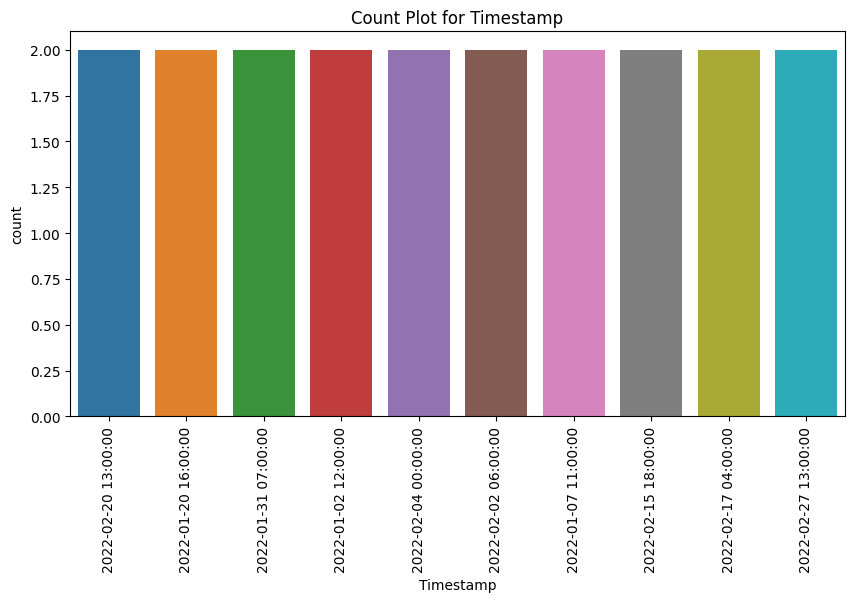

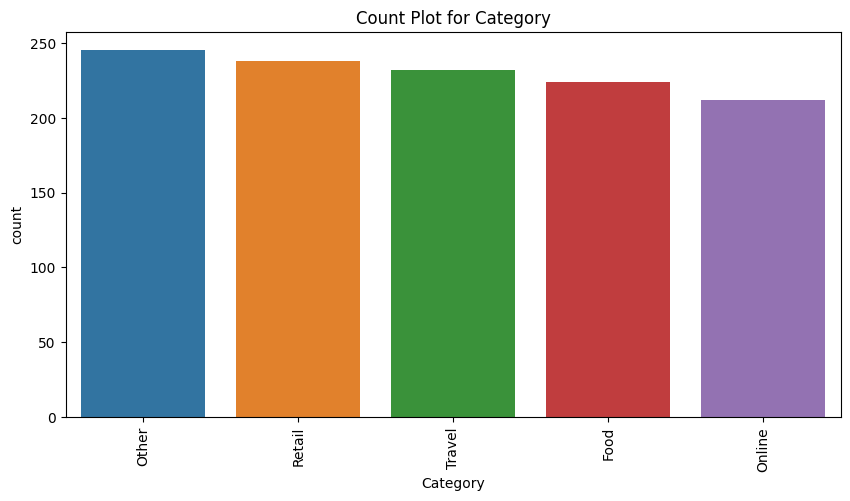

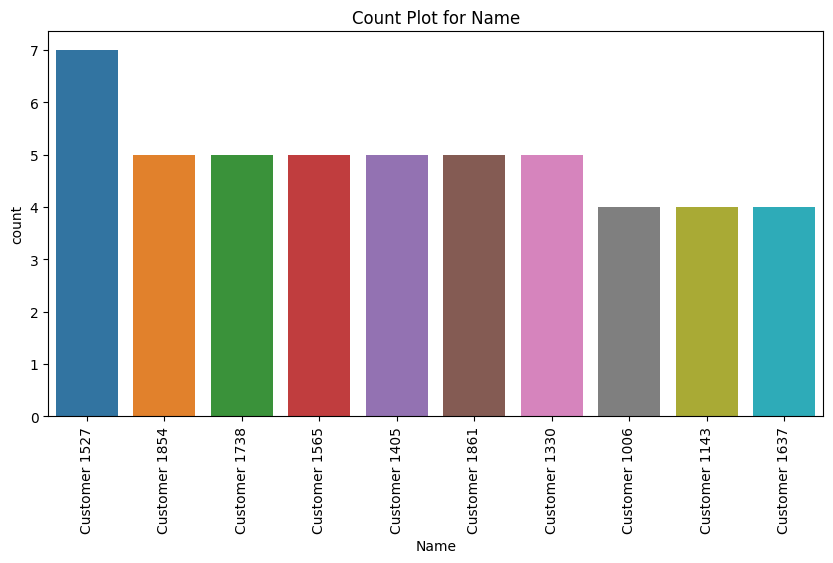

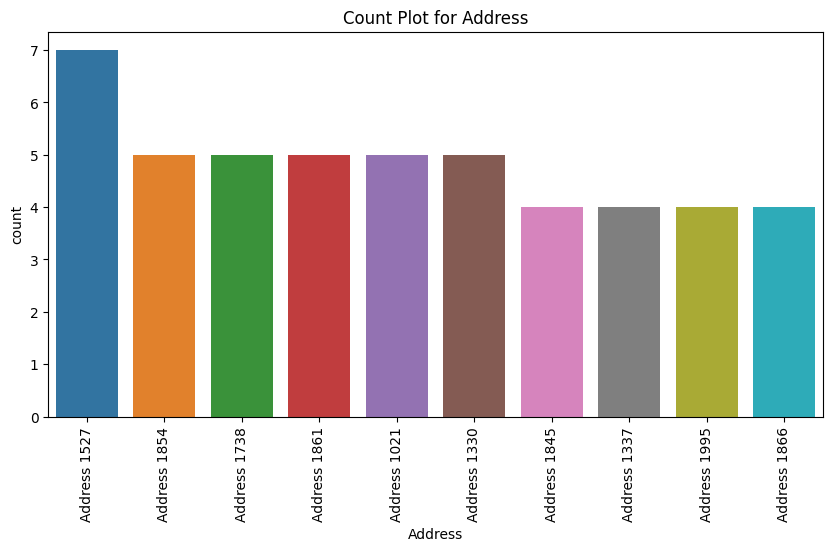

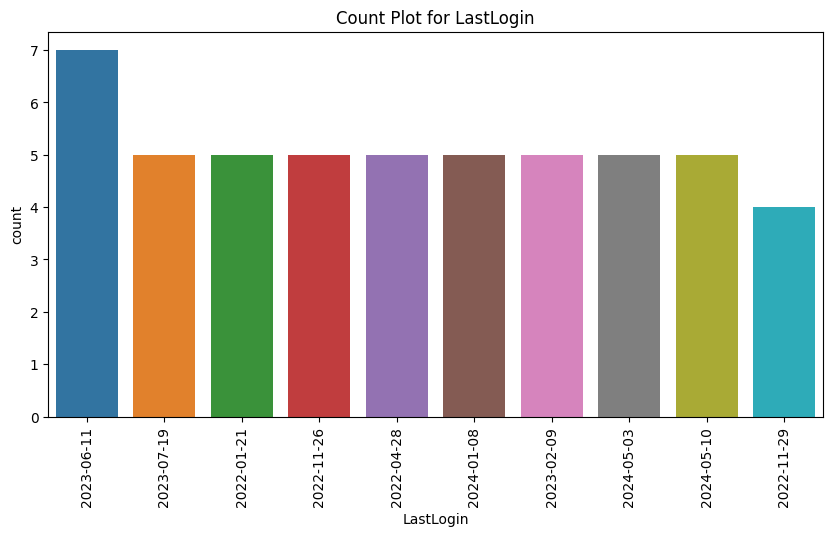

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()


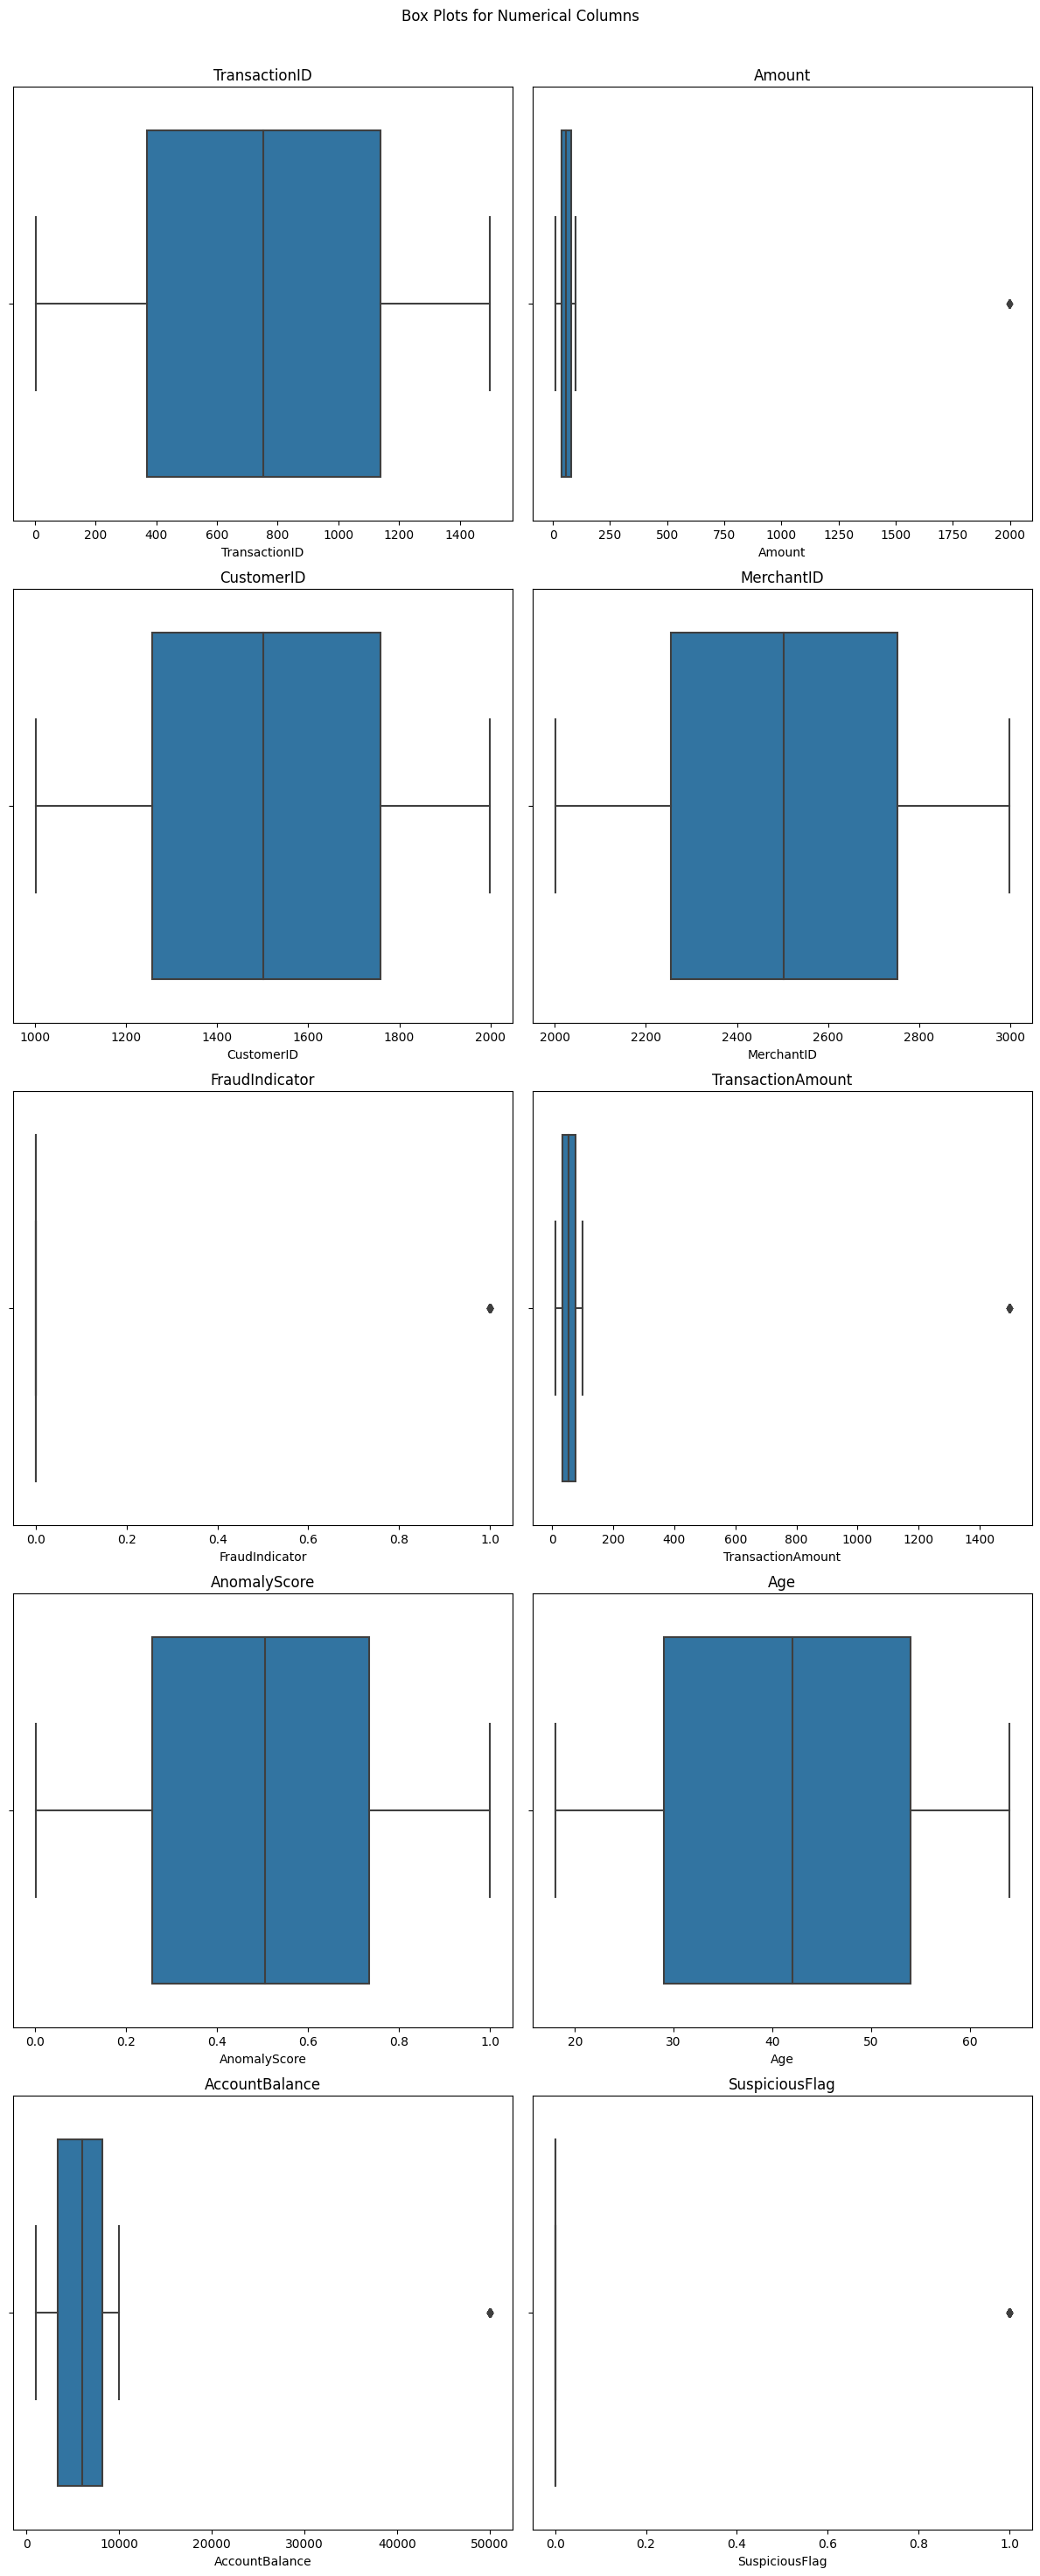

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()


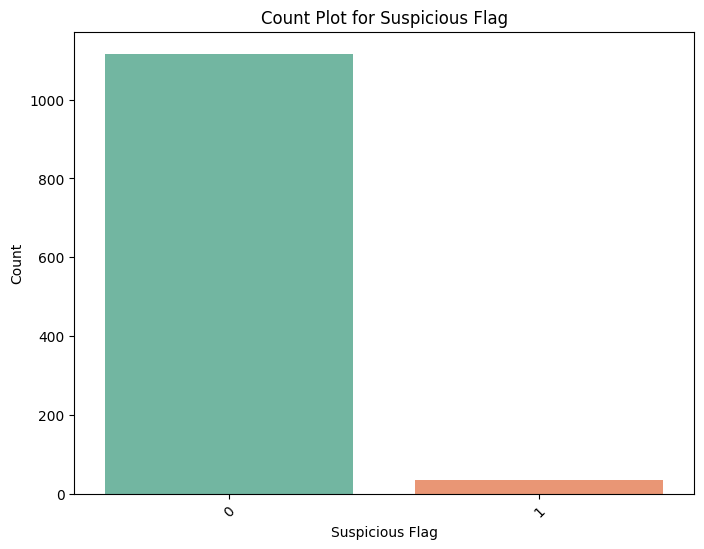

In [ ]:
# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

### Okay we can see the dataset's target feature is heavily imbalanced sowe can use further techiniqes to equalize the feature's values 

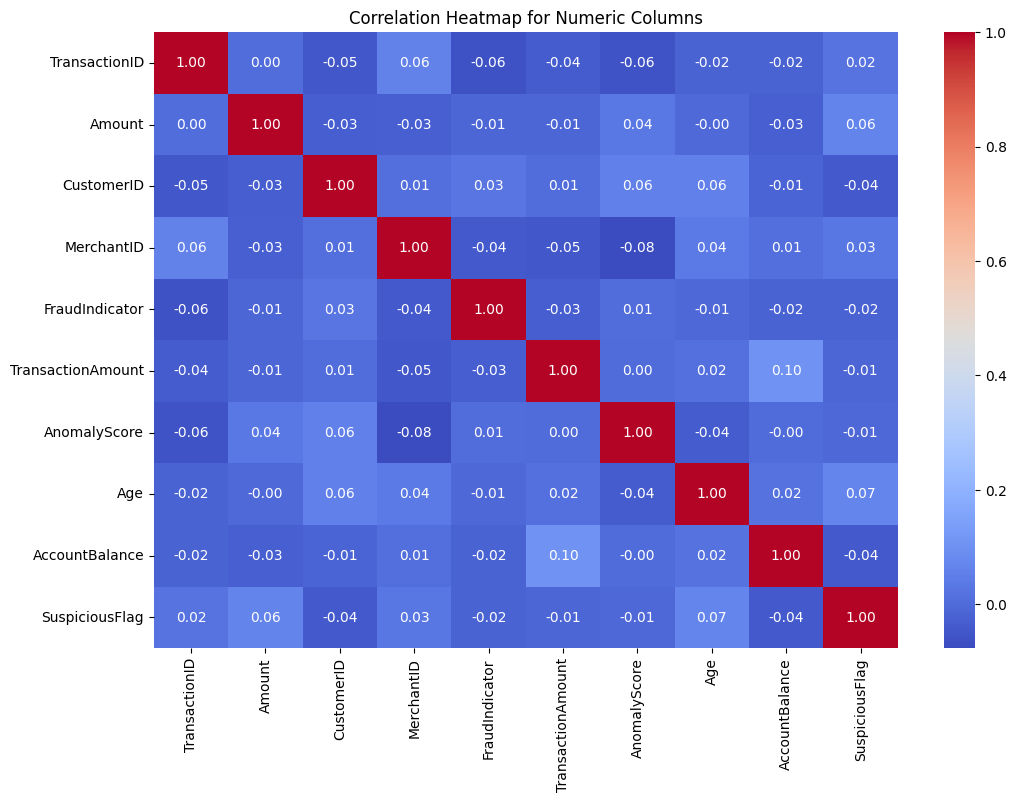

In [ ]:

# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()


when you see that the variables are not correlated with each other, you can see that there is no repetition in the variables used: in the first place, there is no reason to delete columns for statistical reasons.

<div style="background-color: #ffc8dd; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">data cleaning</h1>
</div>


In [ ]:
# Détecter les duplications
duplicates = data.duplicated(keep=False)  # 'keep=False' marque toutes les duplications
print("Duplications détectées:")
print(data[duplicates])

# Identifier les valeurs manquantes
missing_values = data.isnull().sum()
print("\nValeurs manquantes par colonne:")
print(missing_values)

Duplications détectées:
      TransactionID     Amount  CustomerID            Timestamp  MerchantID   
19           1382.0  63.180930      1197.0  2022-02-27 13:00:00      2888.0  \
20           1382.0  63.180930      1197.0  2022-02-27 13:00:00      2888.0   
66             37.0  91.440559      1859.0  2022-01-02 12:00:00      2272.0   
67             37.0  91.440559      1859.0  2022-01-02 12:00:00      2272.0   
93             53.0  93.342171      1177.0  2022-01-03 04:00:00      2208.0   
94             53.0  93.342171      1177.0  2022-01-03 04:00:00      2208.0   
133           775.0  39.770381      1625.0  2022-02-02 06:00:00      2454.0   
134           775.0  39.770381      1625.0  2022-02-02 06:00:00      2454.0   
165           501.0  78.030974      1153.0  2022-01-21 20:00:00      2421.0   
166           501.0  78.030974      1153.0  2022-01-21 20:00:00      2421.0   
244           156.0  27.895035      1473.0  2022-01-07 11:00:00      2332.0   
245           156.0  27.8950

In [ ]:

# Afficher le nombre de lignes avant suppression des doublons
print("Nombre de lignes avant suppression des doublons :", data.shape[0])

# Supprimer les doublons
data = data.drop_duplicates()

# Afficher le nombre de lignes après suppression des doublons
print("Nombre de lignes après suppression des doublons :", data.shape[0])


Nombre de lignes avant suppression des doublons : 1151
Nombre de lignes après suppression des doublons : 1130


In [ ]:
# Imputation pour l'âge
age_median = data['Age'].median()
data['Age'].fillna(age_median, inplace=True)

# Imputation pour l'adresse
most_common_address = data['Address'].mode()[0]
data['Address'].fillna(most_common_address, inplace=True)

In [ ]:
# Afficher le nombre de lignes avant la suppression des données manquantes
print("Nombre de lignes avant la suppression des données manquantes :", data.shape[0])

# Supprimer les lignes avec des données manquantes
data_cleaned = data.dropna()

# Afficher le nombre de lignes après la suppression des données manquantes
print("Nombre de lignes après la suppression des données manquantes :", data_cleaned.shape[0])


Nombre de lignes avant la suppression des données manquantes : 1130
Nombre de lignes après la suppression des données manquantes : 825


 why we are removing the columns "TransactionID", "Name", and "Address" from the dataset:

TransactionID: This is typically a unique identifier for each transaction and does not carry predictive value for modeling purposes. Including it could add unnecessary complexity without benefiting the model's performance.

Name: Names are used to identify individuals but generally do not provide predictive value in data models, except in very specific scenarios. Names can also raise privacy concerns, especially under data protection regulations like GDPR.

Address: If the "Address" column does not contain real or useful geographic information, it may unnecessarily complicate the dataset. Removing it helps to streamline the data, especially when the addresses are not relevant to the analysis or are placeholders without substantive value.

By dropping these columns, we aim to simplify the dataset and focus on variables that contribute meaningfully to the analysis or predictive modeling, enhancing both efficiency and effectiveness.

In [ ]:
# Afficher le DataFrame avant la suppression des colonnes
print("DataFrame avant la suppression des colonnes :")
print(data.head())

# Supprimer les colonnes inutiles
columns_to_drop = ['TransactionID', 'Name', 'Address']
data_cleaned = data.drop(columns=columns_to_drop)

# Afficher le DataFrame après la suppression des colonnes
print("\nDataFrame après la suppression des colonnes :")
print(data_cleaned.head())

DataFrame avant la suppression des colonnes :
   TransactionID     Amount  CustomerID            Timestamp  MerchantID   
0            2.0  77.400052      1897.0  2022-01-01 01:00:00      2049.0  \
1           33.0  39.103095      1897.0  2022-01-02 08:00:00      2924.0   
2          550.0  43.702103      1897.0  2022-01-23 21:00:00      2098.0   
3            6.0  27.255203      1911.0  2022-01-01 05:00:00      2772.0   
4         1282.0  21.575085      1911.0  2022-02-23 09:00:00      2503.0   

   FraudIndicator  TransactionAmount  AnomalyScore Category           Name   
0               0          54.250081      0.888897   Travel            NaN  \
1               0          72.814051      0.284201   Online            NaN   
2               0          81.382011      0.082820   Retail            NaN   
3               0          48.069831      0.015545     Food  Customer 1911   
4               0          15.486801      0.257909   Travel  Customer 1911   

    Age       Address  Accou

In [ ]:
print(data_cleaned.columns)
print('--------------------------------------------')
print(data_cleaned['FraudIndicator'].value_counts(), data_cleaned['SuspiciousFlag'].value_counts(), data_cleaned['Category'].value_counts())

Index(['Amount', 'CustomerID', 'Timestamp', 'MerchantID', 'FraudIndicator',
       'TransactionAmount', 'AnomalyScore', 'Category', 'Age',
       'AccountBalance', 'LastLogin', 'SuspiciousFlag'],
      dtype='object')
--------------------------------------------
FraudIndicator
0    1068
1      62
Name: count, dtype: int64 SuspiciousFlag
0    1096
1      34
Name: count, dtype: int64 Category
Other     241
Retail    234
Travel    229
Food      221
Online    205
Name: count, dtype: int64


<div style="background-color: #ffc8dd; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Feature Engineering</h1>
</div>


time fetures:

In [ ]:
#Converting TimeStamp to datetime format

data_cleaned['Timestamp1'] = pd.to_datetime(data_cleaned['Timestamp'])

print(data_cleaned.dtypes)

data_cleaned['Hour'] = data_cleaned['Timestamp1'].dt.hour
data_cleaned['LastLogin'] = pd.to_datetime(data_cleaned['LastLogin'])
data_cleaned['gap'] = (data_cleaned['Timestamp1'] - data_cleaned['LastLogin']).dt.days.abs()

# Supprimer les lignes avec des données manquantes
data_cleaned = data_cleaned.dropna()



Amount                      float64
CustomerID                  float64
Timestamp                    object
MerchantID                  float64
FraudIndicator                int64
TransactionAmount           float64
AnomalyScore                float64
Category                     object
Age                         float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [ ]:
data_cleaned.head()

,Amount,CustomerID,Timestamp,MerchantID,FraudIndicator,TransactionAmount,AnomalyScore,Category,Age,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,77.400052,1897.0,2022-01-01 01:00:00,2049.0,0,54.250081,0.888897,Travel,33.0,9237.023060,2024-06-15,0,2022-01-01 01:00:00,1.0,896.0
1,39.103095,1897.0,2022-01-02 08:00:00,2924.0,0,72.814051,0.284201,Online,33.0,9237.023060,2024-06-15,0,2022-01-02 08:00:00,8.0,895.0
2,43.702103,1897.0,2022-01-23 21:00:00,2098.0,0,81.382011,0.082820,Retail,33.0,9237.023060,2024-06-15,0,2022-01-23 21:00:00,21.0,874.0
3,27.255203,1911.0,2022-01-01 05:00:00,2772.0,0,48.069831,0.015545,Food,45.0,4872.994428,2024-06-29,0,2022-01-01 05:00:00,5.0,910.0
4,21.575085,1911.0,2022-02-23 09:00:00,2503.0,0,15.486801,0.257909,Travel,45.0,4872.994428,2024-06-29,0,2022-02-23 09:00:00,9.0,857.0


ID features:

In [ ]:
# lets divide the data into two parts: one for training and the other for testing

from sklearn.model_selection import train_test_split

# Sélectionner les colonnes pour la modélisation, en ignorant les colonnes temporelles initiales
features = data_cleaned.drop(['Timestamp', 'Timestamp1', 'LastLogin'], axis=1)
target = data_cleaned['FraudIndicator']

# Diviser les données en 70% pour l'entraînement et 30% pour le test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [ ]:
# Calcul des moyennes pour le mean encoding
merchant_means = X_train.groupby('MerchantID')['FraudIndicator'].mean()
category_means = X_train.groupby('Category')['FraudIndicator'].mean()
customer_means = X_train.groupby('CustomerID')['FraudIndicator'].mean()

# Application des moyennes à l'ensemble d'entraînement
X_train['MerchantID'] = X_train['MerchantID'].map(merchant_means)
X_train['Category'] = X_train['Category'].map(category_means)
X_train['CustomerID'] = X_train['CustomerID'].map(customer_means)

X_test['MerchantID'] = X_test['MerchantID'].map(merchant_means)
X_test['Category'] = X_test['Category'].map(category_means)
X_test['CustomerID'] = X_test['CustomerID'].map(customer_means)

# Assurez-vous de remplir les valeurs manquantes après le mapping
X_train['MerchantID'].fillna(0, inplace=True)
X_train['Category'].fillna(0, inplace=True)
X_train['CustomerID'].fillna(0, inplace=True)

X_test['MerchantID'].fillna(0, inplace=True)
X_test['Category'].fillna(0, inplace=True)
X_test['CustomerID'].fillna(0, inplace=True)

X_train = X_train.drop(['FraudIndicator'], axis=1)
X_test = X_test.drop(['FraudIndicator'], axis=1)


In [ ]:
X_train.head(), X_test.head(), y_train.head(), y_test.head()

(         Amount  CustomerID  MerchantID  TransactionAmount  AnomalyScore   
 1050  32.020889         0.0         0.0          33.322557      0.659570  \
 443   90.102894         0.0         0.0          34.262647      0.327297   
 592   90.538767         0.0         0.0          13.099773      0.165497   
 802   84.337172         0.5         0.5          96.418588      0.063340   
 1006  43.635680         0.0         0.0          31.597724      0.821890   
 
       Category   Age  AccountBalance  SuspiciousFlag  Hour    gap  
 1050  0.042553  27.0     9970.589428               0  23.0  807.0  
 443   0.091667  30.0     8700.429646               0   2.0  975.0  
 592   0.091667  46.0     9335.271983               0   2.0  168.0  
 802   0.033058  41.0     1875.740141               0   1.0  243.0  
 1006  0.070312  26.0     6210.697208               0   2.0  930.0  ,
         Amount  CustomerID  MerchantID  TransactionAmount  AnomalyScore   
 194  54.944902         0.0         0.0      

<div style="background-color: #ccd5ae; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Modelling</h1>
</div>


Meilleur hyperparamètre C trouvé: 2.782559402207126
Performance sur l'ensemble d'entraînement:
  Précision: 0.9318
  Rappel: 1.0000
  F1 Score: 0.9647
  Exactitude: 0.9954

Performance sur l'ensemble de test:
  Précision: 0.1000
  Rappel: 0.0769
  F1 Score: 0.0870
  Exactitude: 0.9247



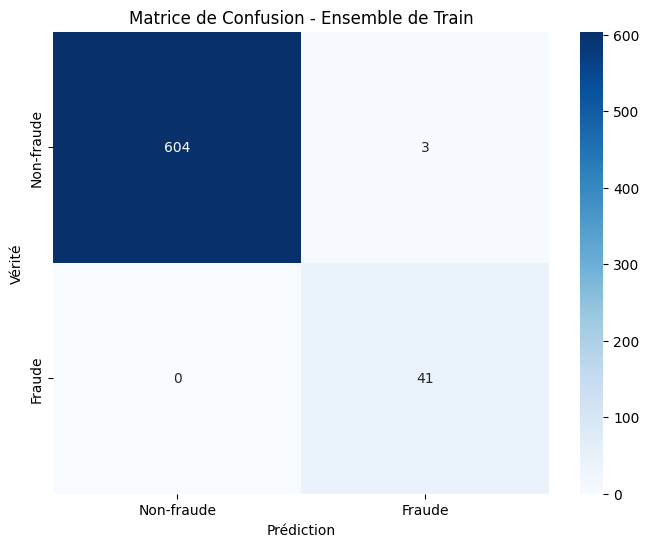

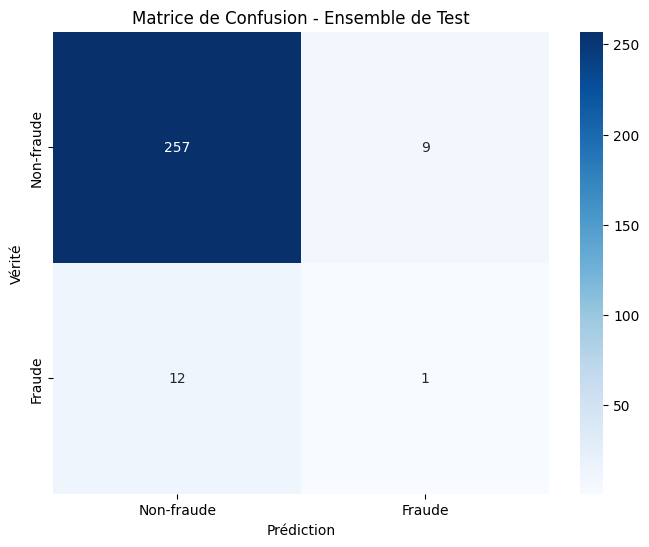

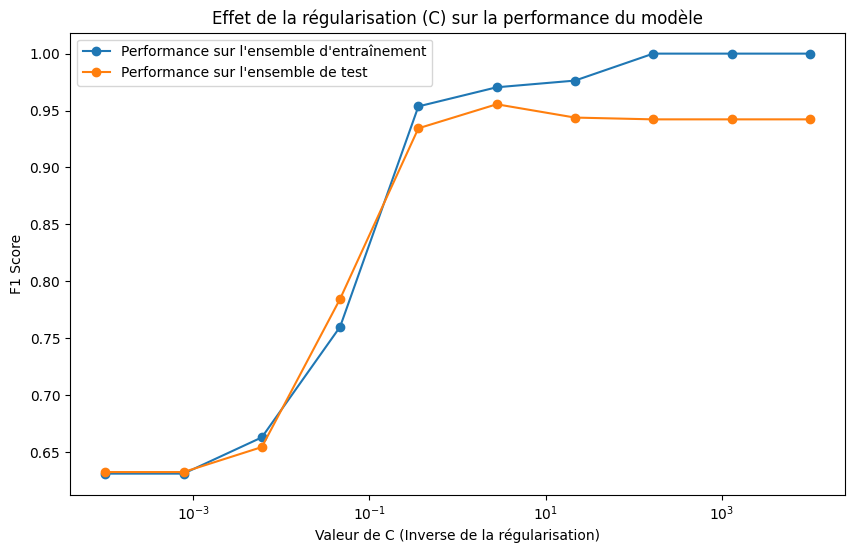

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir la régression logistique avec pondération des classes
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced')

# Hyperparamètre 'C' à optimiser (inverse de la force de régularisation)
param_grid = {'C': np.logspace(-4, 4, 10)}  # explore différentes valeurs de C

# Utiliser GridSearchCV pour trouver le meilleur hyperparamètre C
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Meilleur modèle après optimisation
best_log_reg = grid_search.best_estimator_

# Afficher le meilleur hyperparamètre C
print(f"Meilleur hyperparamètre C trouvé: {grid_search.best_params_['C']}")

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = best_log_reg.predict(X_train_scaled)
y_test_pred = best_log_reg.predict(X_test_scaled)

# Calculer les métriques de performance
def print_metrics(y_true, y_pred, dataset_type):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Performance sur {dataset_type}:")
    print(f"  Précision: {precision:.4f}")
    print(f"  Rappel: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Exactitude: {accuracy:.4f}\n")

print_metrics(y_train, y_train_pred, "l'ensemble d'entraînement")
print_metrics(y_test, y_test_pred, "l'ensemble de test")
# Afficher la matrice de confusion pour l'ensemble de test


conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-fraude', 'Fraude'], yticklabels=['Non-fraude', 'Fraude'])
plt.title('Matrice de Confusion - Ensemble de Train')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

# Afficher la matrice de confusion pour l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-fraude', 'Fraude'], yticklabels=['Non-fraude', 'Fraude'])
plt.title('Matrice de Confusion - Ensemble de Test')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

# Visualiser l'effet de l'hyperparamètre C sur l'overfitting
train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']
param_values = grid_search.cv_results_['param_C']

plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores, label='Performance sur l\'ensemble d\'entraînement', marker='o')
plt.plot(param_values, test_scores, label='Performance sur l\'ensemble de test', marker='o')
plt.xscale('log')
plt.xlabel('Valeur de C (Inverse de la régularisation)')
plt.ylabel('F1 Score')
plt.title('Effet de la régularisation (C) sur la performance du modèle')
plt.legend()
plt.show()




##### High accuracy is not often a good thing in a machine learning model as it states the problem of imbalanced dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter


# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

# Create a count plot for the 'FraudIndicator' column after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(data=pd.DataFrame({'FraudIndicator': y_resampled}), x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator (After Oversampling)')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


NameError: name 'X' is not defined

In [ ]:
# Retraining Logistic regression using SAMPLED Data

model = LogisticRegression()

# Train the model on the training data
model.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print various metrics to evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Model Evaluation Metrics:
Accuracy: 0.645
Precision: 0.12857142857142856
Recall: 0.47368421052631576
F1 Score: 0.20224719101123595
Confusion Matrix:
[[120  61]
 [ 10   9]]


## HYPERPARAMETER TUNING

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression()

# Define a range of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-3, 3, 7),  # Inverse of regularization strength (smaller values for stronger regularization)
    'solver': ['liblinear'],  # Solver for l1 regularization
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the resampled data
y_pred = best_model.predict(X_resampled)

# Calculate and print various metrics to evaluate the model's performance on the resampled data
accuracy = accuracy_score(y_resampled, y_pred)
precision = precision_score(y_resampled, y_pred)
recall = recall_score(y_resampled, y_pred)
f1 = f1_score(y_resampled, y_pred)
confusion = confusion_matrix(y_resampled, y_pred)

print("Model Evaluation Metrics on Resampled Data:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Best Hyperparameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
Model Evaluation Metrics on Resampled Data:
Accuracy: 0.6361256544502618
Precision: 0.6254826254826255
Recall: 0.6785340314136126
F1 Score: 0.6509291813159216
Confusion Matrix:
[[567 388]
 [307 648]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def evaluate_classification_models(X_resampled, y_resampled):
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    # Define a dictionary of classification models
    models = {
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Random Forest Classifier": RandomForestClassifier(),
        "Support Vector Machine (SVM)": SVC(),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
        "Gradient Boosting Classifier": GradientBoostingClassifier()
    }
    
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate and store various metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        
        results[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Confusion Matrix": confusion
        }
    
    return results

results = evaluate_classification_models(X_resampled, y_resampled)
for model_name, model_result in results.items():
     print(f"Results for {model_name}:")
     for metric, value in model_result.items():
         print(f"{metric}: {value}")
     print()


Results for Decision Tree Classifier:
Accuracy: 0.8586387434554974
Precision: 0.8324873096446701
Recall: 0.8864864864864865
F1 Score: 0.8586387434554974
Confusion Matrix: [[164  33]
 [ 21 164]]

Results for Random Forest Classifier:
Accuracy: 0.918848167539267
Precision: 0.8666666666666667
Recall: 0.9837837837837838
F1 Score: 0.9215189873417721
Confusion Matrix: [[169  28]
 [  3 182]]

Results for Support Vector Machine (SVM):
Accuracy: 0.5235602094240838
Precision: 0.5062240663900415
Recall: 0.6594594594594595
F1 Score: 0.5727699530516432
Confusion Matrix: [[ 78 119]
 [ 63 122]]

Results for K-Nearest Neighbors (KNN):
Accuracy: 0.8324607329842932
Precision: 0.7665198237885462
Recall: 0.9405405405405406
F1 Score: 0.8446601941747574
Confusion Matrix: [[144  53]
 [ 11 174]]

Results for Gradient Boosting Classifier:
Accuracy: 0.8691099476439791
Precision: 0.8026905829596412
Recall: 0.9675675675675676
F1 Score: 0.8774509803921569
Confusion Matrix: [[153  44]
 [  6 179]]



# Ranking Models perfromance
1. Random Forest Classifier
2. Gradient Boosting Algorithm
3. Decision Tree Classifier
4. K-Nearest Neighbours
5. Support Vector Machine (SVC)
6. Logistic Regression

### Now we can HyperParameterTune the <h1><b>RandomForest CLassifier</b></h1>

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the resampled data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Train the best model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_rf_model.predict(X_test)

# Calculate and print various metrics to evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Best Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Model Evaluation Metrics:
Accuracy: 0.9162303664921466
Precision: 0.8591549295774648
Recall: 0.9891891891891892
F1 Score: 0.9195979899497488
Confusion Matrix:
[[167  30]
 [  2 183]]
